In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [18]:
df = pd.read_csv('listings Ottawa_Ontario_Canada.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,34220,https://www.airbnb.com/rooms/34220,2.020000e+13,2020-11-08,Room available,<b>The space</b><br />This room is part of a t...,NaN,https://a0.muscache.com/pictures/192935/3bf5a8...,147438,https://www.airbnb.com/users/show/147438,Mark,2010-06-18,CA,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,1,1,[],f,f,NaN,Capital,NaN,45.40924,-75.67900,Private room in apartment,Private room,2,NaN,1 bath,1.0,1.0,"[""Wifi"", ""Heating"", ""Free parking on premises""...",$202.00,7,31,7,7,31,31,7.0,31.0,NaN,t,30,60,90,365,2020-11-08,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,36642,https://www.airbnb.com/rooms/36642,2.020000e+13,2020-11-08,City Conveniences A Country Setting,<b>The space</b><br />Are you planning a vacat...,NaN,https://a0.muscache.com/pictures/7542487/52136...,157787,https://www.airbnb.com/users/show/157787,Donna,2010-07-04,"Ottawa, Ontario, Canada",I am originally from Nova Scotia but I have li...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/157787/profil...,https://a0.muscache.com/im/users/157787/profil...,NaN,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Kitchissippi,NaN,45.40159,-75.74679,Private room in house,Private room,2,NaN,2 baths,1.0,1.0,"[""Private living room"", ""Hair dryer"", ""Hangers...",$65.00,3,14,3,3,14,14,3.0,14.0,NaN,t,0,0,0,191,2020-11-08,87,1,0,2010-07-11,2020-02-17,94.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,f,1,0,1,0,0.69
2,59258,https://www.airbnb.com/rooms/59258,2.020000e+13,2020-11-08,Lower level of my house to rent,"Lower 1/2 of bungalow, a separate entrance, 10...",NaN,https://a0.muscache.com/pictures/359337/5d90d6...,284351,https://www.airbnb.com/users/show/284351,Elena,2010-11-11,"Ottawa, Ontario, Canada",Canada rocks!,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/284351/profil...,https://a0.muscache.com/im/users/284351/profil...,NaN,1,1,"['email', 'phone', 'reviews', 'offline_governm...",t,t,NaN,Bay,NaN,45.35900,-75.80314,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Wifi"", ""Heating"", ""Dryer"", ""TV"", ""Washer"", ""...",$200.00,3,730,3,3,730,730,3.0,730.0,NaN,t,0,0,0,0,2020-11-08,1,0,0,2011-07-04,2011-07-04,100.0,10.0,8.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.01
3,158824,https://www.airbnb.com/rooms/158824,2.020000e+13,2020-11-08,DOWNTOWN/GLEBE HOUSE WITH BACKYARD,Big 3 bedroom house with backyard in desirable...,Very popular neighbourhood surrounded by milli...,https://a0.muscache.com/pictures/82249081/0a7b...,87296,https://www.airbnb.com/users/show/87296,Luc,2010-03-02,"Ottawa, Ontario, Canada",World Traveler always interested to meet new p...,within an hour,100%,100%,f,https://a0.

In [19]:
df.shape

(2669, 74)

In [20]:
df = df.drop_duplicates()
print(df.shape)

(2669, 74)


In [21]:
df.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
name                                              0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               428
Length: 74, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2669 entries, 0 to 2668
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2669 non-null   int64  
 1   listing_url                                   2669 non-null   object 
 2   scrape_id                                     2669 non-null   float64
 3   last_scraped                                  2669 non-null   object 
 4   name                                          2669 non-null   object 
 5   description                                   2574 non-null   object 
 6   neighborhood_overview                         1827 non-null   object 
 7   picture_url                                   2669 non-null   object 
 8   host_id                                       2669 non-null   int64  
 9   host_url                                      2669 non-null   o

In [23]:
pd.set_option('display.max_rows', None)

# Examine data quality

In [24]:
# Check rate of missing values

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
percent_missing

id                                                0.000000
listing_url                                       0.000000
scrape_id                                         0.000000
last_scraped                                      0.000000
name                                              0.000000
description                                       3.559386
neighborhood_overview                            31.547396
picture_url                                       0.000000
host_id                                           0.000000
host_url                                          0.000000
host_name                                         0.000000
host_since                                        0.000000
host_location                                     0.074934
host_about                                       39.715249
host_response_time                               28.887224
host_response_rate                               28.887224
host_acceptance_rate                             17.4222

In [25]:
# df.review_scores_rating.fillna(0, inplace = True)
print(df.review_scores_rating.unique())

[ nan  94. 100.  95.  99.  96.  92.  90.  98.  97.  91.  93.  84.  89.
  87.  88.  80.  86.  85.  70.  20.  67.  82.  60.  81.  73.  50.  83.
  77.  76.  40.  74.  75.  78.]


In [26]:
# df.review_scores_accuracy.fillna(0, inplace = True)
print(df.review_scores_accuracy.unique())

[nan 10.  9.  8.  2.  6.  7.  3.  4.  5.]


In [27]:
# df.review_scores_cleanliness.fillna(0, inplace = True)
print(df.review_scores_cleanliness.unique())

[nan 10.  8.  9.  2.  7.  4.  6.  5.]


In [28]:
# df.review_scores_checkin.fillna(0, inplace = True)
print(df.review_scores_checkin.unique())

[nan 10.  9.  8.  7.  2.  6.  4.]


In [29]:
# df.review_scores_communication.fillna(0, inplace = True)
print(df.review_scores_communication.unique())

[nan 10.  9.  7.  2.  8.  6.  4.]


In [30]:
# df.review_scores_location.fillna(0, inplace = True)
print(df.review_scores_location.unique())

[nan 10.  9.  8.  7.  2.  6.  4.]


In [31]:
# df.review_scores_value.fillna(0, inplace = True)
print(df.review_scores_value.unique())

[nan  9. 10.  8.  6.  2.  7.  4.  3.  5.]


# Drop irrelevant features

In [32]:
# remove irrelavent variables

df = df.drop(labels=['host_neighbourhood','neighbourhood_group_cleansed','bathrooms','calendar_updated','license','neighbourhood',
                    'listing_url','scrape_id','last_scraped','name','description','neighborhood_overview','picture_url','host_id',
                    'host_url','host_name','host_since','host_location','host_about','host_response_time','host_thumbnail_url','host_picture_url',
                    'host_listings_count','host_total_listings_count','host_verifications','amenities','minimum_minimum_nights',
                    'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','has_availability','availability_60','availability_90',
                    'availability_365','calendar_last_scraped','first_review','last_review','calculated_host_listings_count',
                    'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                     'calculated_host_listings_count_shared_rooms'], axis=1)

# Covert data format

## character to numeric

In [33]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip("%").astype(float)/100
# df.host_acceptance_rate.fillna(0, inplace = True)
print(df.host_acceptance_rate.unique())

[ nan 1.   0.71 0.   0.95 0.97 0.7  0.67 0.25 0.91 0.77 0.82 0.38 0.27
 0.99 0.94 0.92 0.33 0.75 0.79 0.8  0.65 0.47 0.2  0.86 0.93 0.5  0.57
 0.89 0.46 0.96 0.9  0.73 0.88 0.98 0.85 0.83 0.13 0.62 0.32 0.58 0.39
 0.6  0.61 0.54 0.87 0.53 0.69 0.4  0.74 0.81 0.44 0.23 0.84 0.56 0.63
 0.41 0.72 0.78 0.68 0.14 0.43 0.59 0.66 0.64 0.76 0.29 0.55]


In [34]:
df['host_response_rate'] = df['host_response_rate'].str.rstrip("%").astype(float)/100
# df.host_response_rate.fillna(0, inplace = True)
print(df.host_response_rate.unique())

[ nan 1.   0.71 0.8  0.9  0.   0.67 0.33 0.5  0.89 0.91 0.92 0.75 0.6
 0.17 0.93 0.94 0.97 0.99 0.4  0.86 0.83 0.85 0.25 0.88 0.7  0.95 0.47
 0.96 0.63 0.98 0.2  0.78]


In [35]:
#pd.options.display.float_format = '{:,.2f}'.format
df.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,34220,NaN,NaN,f,f,f,Capital,45.40924,-75.67900,Private room in apartment,Private room,2,1 bath,1.0,1.0,$202.00,7,31,7.0,31.0,30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
1,36642,NaN,1.00,f,t,f,Kitchissippi,45.40159,-75.74679,Private room in house,Private room,2,2 baths,1.0,1.0,$65.00,3,14,3.0,14.0,0,87,1,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,f,0.69
2,59258,NaN,NaN,f,t,t,Bay,45.35900,-75.80314,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,$200.00,3,730,3.0,730.0,0,1,0,0,100.0,10.0,8.0,10.0,10.0,10.0,10.0,f,0.01
3,158824,1.0,1.00,f,t,t,Capital,45.40248,-75.69941,Entire house,Entire home/apt,3,1 bath,2.0,2.0,$140.00,3,365,3.0,365.0,0,7,0,0,95.0,10.0,9.0,10.0,10.0,10.0,10.0,f,0.06
4,261065,1.0,0.71,t,t,t,Kitchissippi,45.38972,-75.75496,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,$150.00,3,180,3.0,180.0,0,64,4,1,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,0.59


## boolean to numeric

In [36]:
df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0})

In [37]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': 1, 'f': 0})

In [38]:
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})

In [39]:
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0})

In [40]:
df.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,34220,NaN,NaN,0,0,0,Capital,45.40924,-75.67900,Private room in apartment,Private room,2,1 bath,1.0,1.0,$202.00,7,31,7.0,31.0,30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,36642,NaN,1.00,0,1,0,Kitchissippi,45.40159,-75.74679,Private room in house,Private room,2,2 baths,1.0,1.0,$65.00,3,14,3.0,14.0,0,87,1,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0.69
2,59258,NaN,NaN,0,1,1,Bay,45.35900,-75.80314,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,$200.00,3,730,3.0,730.0,0,1,0,0,100.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0.01
3,158824,1.0,1.00,0,1,1,Capital,45.40248,-75.69941,Entire house,Entire home/apt,3,1 bath,2.0,2.0,$140.00,3,365,3.0,365.0,0,7,0,0,95.0,10.0,9.0,10.0,10.0,10.0,10.0,0,0.06
4,261065,1.0,0.71,1,1,1,Kitchissippi,45.38972,-75.75496,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,$150.00,3,180,3.0,180.0,0,64,4,1,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.59


# Understand specific variables
## Check property_type

<AxesSubplot:xlabel='count', ylabel='property_type'>

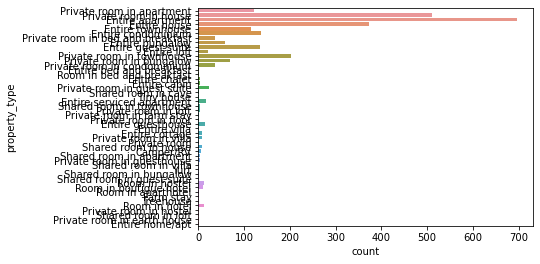

In [41]:
sns.countplot(y = 'property_type', data=df)

In [42]:
df.property_type.value_counts()

Entire apartment                     697
Private room in house                511
Entire house                         372
Private room in townhouse            202
Entire condominium                   137
Entire guest suite                   134
Private room in apartment            122
Entire townhouse                     114
Private room in bungalow              69
Entire bungalow                       58
Private room in condominium           37
Private room in bed and breakfast     36
Private room in guest suite           23
Entire loft                           20
Entire serviced apartment             17
Entire guesthouse                     15
Room in hostel                        12
Room in hotel                         11
Room in boutique hotel                10
Private room in villa                  8
Shared room in house                   8
Entire cottage                         7
Camper/RV                              5
Entire cabin                           4
Shared room in a

## Group classes

In [43]:
df['property_type_new'] = df['property_type']

In [44]:
df.property_type_new.replace(['Yurt','Camper/RV','Shared room in cave','Tiny house','Treehouse','Private room in earth house',
                         'Private room in farm stay','Private room','Farm stay'],'Others',inplace=True)

In [45]:
df.property_type_new.replace(['Private room in bed and breakfast','Room in bed and breakfast',
                          'Entire bed and breakfast'],'Room in bed and breakfast',inplace=True)

In [46]:
df.property_type_new.replace(['Room in hostel','Private room in hostel'],'Hostel',inplace=True)

In [47]:
df.property_type_new.replace(['Entire guest suite','Private room in guest suite','Entire guesthouse',
                         'Room in hotel','Room in boutique hotel','Private room in guesthouse',
                         'Room in aparthotel','Shared room in guest suite'],'Hotel',inplace=True)

In [48]:
df.property_type_new.replace(['Entire cottage','Entire cabin','Entire chalet'],'Cottage/cabin/chalet',inplace=True)

In [49]:
df.property_type_new.replace(['Entire apartment','Entire condominium','Private room in apartment','Entire serviced apartment',
                    'Private room in condominium','Entire loft','Entire serviced apartment','Shared room in apartment',
                    'Private room in loft','Shared room in loft','Private room in floor','Entire home/apt'], 'Apt/condo',inplace=True)

In [50]:
df.property_type_new.replace(['Private room in house','Entire house','Private room in bungalow',
                         'Entire bungalow','Shared room in house','Shared room in bungalow'], 'House/bungalow',inplace=True)

In [51]:
df.property_type_new.replace(['Private room in villa','Shared room in villa','Entire villa'],'Villa',inplace=True)

In [52]:
df.property_type_new.replace(['Private room in townhouse','Entire townhouse','Shared room in townhouse'],'Townhouse',inplace=True)

In [53]:
df.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,property_type_new
0,34220,NaN,NaN,0,0,0,Capital,45.40924,-75.67900,Private room in apartment,Private room,2,1 bath,1.0,1.0,$202.00,7,31,7.0,31.0,30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Apt/condo
1,36642,NaN,1.00,0,1,0,Kitchissippi,45.40159,-75.74679,Private room in house,Private room,2,2 baths,1.0,1.0,$65.00,3,14,3.0,14.0,0,87,1,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0.69,House/bungalow
2,59258,NaN,NaN,0,1,1,Bay,45.35900,-75.80314,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,$200.00,3,730,3.0,730.0,0,1,0,0,100.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0.01,Apt/condo
3,158824,1.0,1.00,0,1,1,Capital,45.40248,-75.69941,Entire house,Entire home/apt,3,1 bath,2.0,2.0,$140.00,3,365,3.0,365.0,0,7,0,0,95.0,10.0,9.0,10.0,10.0,10.0,10.0,0,0.06,House/bungalow
4,261065,1.0,0.71,1,1,1,Kitchissippi,45.38972,-75.75496,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,$150.00,3,180,3.0,180.0,0,64,4,1,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.59,Apt/condo


<AxesSubplot:xlabel='count', ylabel='property_type_new'>

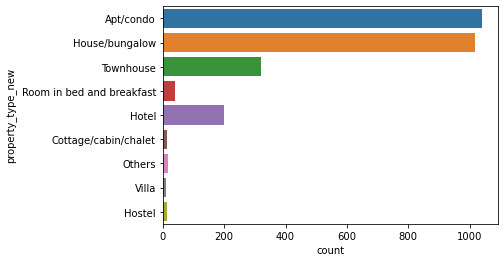

In [54]:
sns.countplot(y = 'property_type_new', data=df)

In [57]:
print(df.property_type_new.unique())

['Apt/condo' 'House/bungalow' 'Townhouse' 'Room in bed and breakfast'
 'Hotel' 'Cottage/cabin/chalet' 'Others' 'Villa' 'Hostel']


In [58]:
#df = pd.get_dummies(df, columns=['property_type_new'])

<AxesSubplot:xlabel='count', ylabel='room_type'>

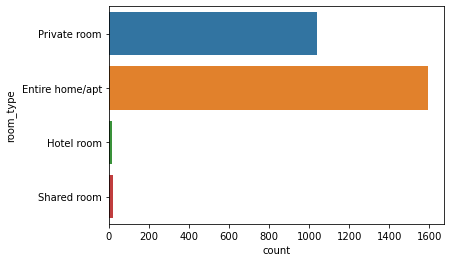

In [59]:
sns.countplot(y = 'room_type', data=df)

In [60]:
#df = pd.get_dummies(df, columns=['room_type'])
df.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,property_type_new
0,34220,NaN,NaN,0,0,0,Capital,45.40924,-75.67900,Private room in apartment,Private room,2,1 bath,1.0,1.0,$202.00,7,31,7.0,31.0,30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Apt/condo
1,36642,NaN,1.00,0,1,0,Kitchissippi,45.40159,-75.74679,Private room in house,Private room,2,2 baths,1.0,1.0,$65.00,3,14,3.0,14.0,0,87,1,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0.69,House/bungalow
2,59258,NaN,NaN,0,1,1,Bay,45.35900,-75.80314,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,$200.00,3,730,3.0,730.0,0,1,0,0,100.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0.01,Apt/condo
3,158824,1.0,1.00,0,1,1,Capital,45.40248,-75.69941,Entire house,Entire home/apt,3,1 bath,2.0,2.0,$140.00,3,365,3.0,365.0,0,7,0,0,95.0,10.0,9.0,10.0,10.0,10.0,10.0,0,0.06,House/bungalow
4,261065,1.0,0.71,1,1,1,Kitchissippi,45.38972,-75.75496,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,$150.00,3,180,3.0,180.0,0,64,4,1,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.59,Apt/condo


In [61]:
df['price_new']=df['price'].str.extract('(\d+)')

In [62]:
df['price_new'] = df['price_new'].astype(int)

In [63]:
df.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,property_type_new,price_new
0,34220,NaN,NaN,0,0,0,Capital,45.40924,-75.67900,Private room in apartment,Private room,2,1 bath,1.0,1.0,$202.00,7,31,7.0,31.0,30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Apt/condo,202
1,36642,NaN,1.00,0,1,0,Kitchissippi,45.40159,-75.74679,Private room in house,Private room,2,2 baths,1.0,1.0,$65.00,3,14,3.0,14.0,0,87,1,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0.69,House/bungalow,65
2,59258,NaN,NaN,0,1,1,Bay,45.35900,-75.80314,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,$200.00,3,730,3.0,730.0,0,1,0,0,100.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0.01,Apt/condo,200
3,158824,1.0,1.00,0,1,1,Capital,45.40248,-75.69941,Entire house,Entire home/apt,3,1 bath,2.0,2.0,$140.00,3,365,3.0,365.0,0,7,0,0,95.0,10.0,9.0,10.0,10.0,10.0,10.0,0,0.06,House/bungalow,140
4,261065,1.0,0.71,1,1,1,Kitchissippi,45.38972,-75.75496,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,$150.00,3,180,3.0,180.0,0,64,4,1,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.59,Apt/condo,150


In [64]:
df['bathroom']=df['bathrooms_text'].str.extract('(\d+)')

In [65]:
df.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,property_type_new,price_new,bathroom
0,34220,NaN,NaN,0,0,0,Capital,45.40924,-75.67900,Private room in apartment,Private room,2,1 bath,1.0,1.0,$202.00,7,31,7.0,31.0,30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Apt/condo,202,1
1,36642,NaN,1.00,0,1,0,Kitchissippi,45.40159,-75.74679,Private room in house,Private room,2,2 baths,1.0,1.0,$65.00,3,14,3.0,14.0,0,87,1,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0.69,House/bungalow,65,2
2,59258,NaN,NaN,0,1,1,Bay,45.35900,-75.80314,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,$200.00,3,730,3.0,730.0,0,1,0,0,100.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0.01,Apt/condo,200,1
3,158824,1.0,1.00,0,1,1,Capital,45.40248,-75.69941,Entire house,Entire home/apt,3,1 bath,2.0,2.0,$140.00,3,365,3.0,365.0,0,7,0,0,95.0,10.0,9.0,10.0,10.0,10.0,10.0,0,0.06,House/bungalow,140,1
4,261065,1.0,0.71,1,1,1,Kitchissippi,45.38972,-75.75496,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,$150.00,3,180,3.0,180.0,0,64,4,1,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.59,Apt/condo,150,1


In [66]:
print(df.bathroom.unique())

['1' '2' '3' nan '0' '4' '6' '5']


In [67]:
nan_in_bathroom = df[df['bathroom'].isna()]
nan_in_bathroom

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,property_type_new,price_new,bathroom
118,6153530,1.00,NaN,0,1,1,Alta Vista,45.38560,-75.64161,Private room in bungalow,Private room,2,Private half-bath,1.0,1.0,$70.00,2,365,2.0,1125.0,23,43,0,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.65,House/bungalow,70,NaN
217,9714975,NaN,NaN,0,1,0,College,45.31876,-75.83330,Shared room in townhouse,Shared room,1,NaN,1.0,1.0,$75.00,1,1125,1.0,1125.0,29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Townhouse,75,NaN
1209,28007034,1.00,0.94,1,1,1,Rideau-Goulbourn,45.10303,-75.79308,Entire cabin,Entire home/apt,2,Half-bath,NaN,1.0,$98.00,2,14,2.0,1125.0,9,142,36,3,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,5.34,Cottage/cabin/chalet,98,NaN
1253,28495834,NaN,NaN,0,1,0,Cumberland,45.45269,-75.47382,Private room in house,Private room,2,Shared half-bath,2.0,2.0,$80.00,2,3,2.0,3.0,28,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,House/bungalow,80,NaN
1468,32061278,1.00,1.00,0,1,1,West Carleton-March,45.43919,-76.28678,Yurt,Entire home/apt,4,Half-bath,NaN,0.0,$120.00,2,1125,2.0,1125.0,0,8,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.52,Others,120,NaN
2277,42980892,0.67,0.00,0,1,0,West Carleton-March,45.27298,-76.00625,Private room in guest suite,Private room,2,NaN,NaN,1.0,$59.00,1,1125,1.0,1125.0,29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Hotel,59,NaN


In [68]:
#replace NaN by 0.5 (half bathroom)

df.bathroom.fillna(0.5, inplace = True)

In [69]:
df['bathroom'] = df['bathroom'].astype(int)

In [70]:
#df.drop('bathrooms_text', inplace=True, axis=1)

In [71]:
df.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,property_type_new,price_new,bathroom
0,34220,NaN,NaN,0,0,0,Capital,45.40924,-75.67900,Private room in apartment,Private room,2,1 bath,1.0,1.0,$202.00,7,31,7.0,31.0,30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Apt/condo,202,1
1,36642,NaN,1.00,0,1,0,Kitchissippi,45.40159,-75.74679,Private room in house,Private room,2,2 baths,1.0,1.0,$65.00,3,14,3.0,14.0,0,87,1,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0.69,House/bungalow,65,2
2,59258,NaN,NaN,0,1,1,Bay,45.35900,-75.80314,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,$200.00,3,730,3.0,730.0,0,1,0,0,100.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0.01,Apt/condo,200,1
3,158824,1.0,1.00,0,1,1,Capital,45.40248,-75.69941,Entire house,Entire home/apt,3,1 bath,2.0,2.0,$140.00,3,365,3.0,365.0,0,7,0,0,95.0,10.0,9.0,10.0,10.0,10.0,10.0,0,0.06,House/bungalow,140,1
4,261065,1.0,0.71,1,1,1,Kitchissippi,45.38972,-75.75496,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,$150.00,3,180,3.0,180.0,0,64,4,1,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.59,Apt/condo,150,1


In [72]:
#df.to_csv('Airbnb Ottawa_cleansed_3.csv', index=False)

In [73]:
df.drop(['id','bathrooms_text','price'],axis=1, inplace=True)

In [74]:
df1 = pd.DataFrame(df, columns=['accommodates','bedrooms','beds','bathroom','price_new'])

In [75]:
df1.describe()

,accommodates,bedrooms,beds,bathroom,price_new
count,2669.000000,2457.000000,2649.000000,2669.000000,2669.000000
mean,3.540277,1.672365,1.894300,1.216935,104.020982
std,2.529505,1.040165,1.437311,0.563573,86.279789
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,55.000000
50%,2.000000,1.000000,1.000000,1.000000,81.000000
75%,4.000000,2.000000,2.000000,1.000000,120.000000
max,16.000000,9.000000,16.000000,6.000000,913.000000


In [76]:
df.corr()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price_new,bathroom
host_response_rate,1.000000,0.258287,0.216862,0.096278,0.112956,0.006533,-0.018234,0.051728,0.033947,0.036390,-0.059092,-0.046988,-0.063323,-0.095524,-0.039968,0.070635,0.149059,0.136859,0.114617,0.117370,0.111711,0.142389,0.163409,0.119381,0.123116,-0.054607,0.126355,-0.001296,0.042092
host_acceptance_rate,0.258287,1.000000,0.181641,0.000978,0.183733,0.072696,-0.023999,0.031374,-0.027621,-0.014186,-0.032721,0.006933,-0.032047,-0.024715,-0.039731,0.174089,0.259980,0.189471,0.021908,0.030150,0.030558,0.034348,0.022953,0.046928,0.009315,0.249443,0.298229,-0.036749,-0.034185
host_is_superhost,0.216862,0.181641,1.000000,0.044891,0.091075,-0.060568,-0.073891,-0.029882,-0.056540,-0.044550,-0.002828,-0.077213,-0.001873,-0.028544,-0.098816,0.202384,0.224350,0.166641,0.271300,0.228368,0.289391,0.152745,0.176388,0.165932,0.286196,-0.089387,0.191207,-0.066166,-0.073384
host_has_profile_pic,0.096278,0.000978,0.044891,1.000000,0.009967,-0.017839,-0.030684,0.004170,0.000429,0.001451,0.008928,0.049277,0.009177,0.002924,-0.075209,0.014652,0.007218,-0.000523,0.039327,0.033188,0.013301,0.066804,0.038294,-0.007112,0.058104,-0.038457,0.008020,-0.029148,0.011154
host_identity_verified,0.112956,0.183733,0.091075,0.009967,1.000000,0.114485,0.012491,0.096103,0.050943,0.039123,0.016613,0.091887,0.017579,0.020145,-0.077304,0.165739,0.138548,0.096881,0.010528,0.043462,0.014844,0.046414,0.049030,0.044934,0.018919,-0.012647,0.179902,0.025940,0.030891
latitude,0.006533,0.072696,-0.060568,-0.017839,0.114485,1.000000,0.456045,0.003284,-0.005936,-0.026348,0.059326,0.078885,0.059731,0.011899,-0.021906,0.085984,0.063048,0.068359,-0.076729,-0.068173,-0.088082,-0.050159,-0.053266,0.028266,-0.094450,0.004123,0.109499,0.016780,-0.029789
longitude,-0.018234,-0.023999,-0.073891,-0.030684,0.012491,0.456045,1.000000,-0.032315,-0.033015,-0.033015,0.000105,0.019384,-0.002247,-0.000117,0.021232,0.024281,0.009952,0.019261,-0.071408,-0.073113,-0.072909,-0.073012,-0.071108,-0.051977,-0.054636,0.030140,0.046038,-0.052169,-0.021568
accommodates,0.051728,0.031374,-0.029882,0.004170,0.096103,0.003284,-0.032315,1.000000,0.843631,0.851579,-0.022687,0.096101,-0.017679,0.007058,-0.003416,0.085566,0.106935,0.075832,0.020127,-0.001267,-0.002683,0.056851,0.027494,0.052355,0.002278,-0.023893,0.120429,0.518211,0.443073
bedrooms,0.033947,-0.027621,-0.056540,0.000429,0.050943,-0.005936,-0.033015,0.843631,1.000000,0.827691,-0.001009,0.086351,0.001504,-0.006680,-0.010234,0.002136,0.017982,0.013562,0.018314,-0.007747,0.008059,0.035071,0.008010,0.040294,0.003907,-0.065417,0.010193,0.557453,0.532274
beds,0.036390,-0.014186,-0.044550,0.001451,0.039123,-0.026348,-0.033015,0.851579,0.827691,1.000000,-0.018655,0.083391,-0.014263,0.002875,0.004011,0.034627,0.060842,0.025793,0.022128,-0.006112,-0.008236,0.044632,0.028063,0.049809,0.003587,-0.035074,0.045547,0.470606,0.457480


In [77]:
#df1.corr()

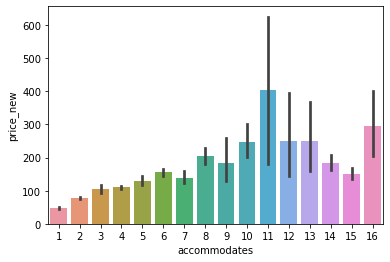

In [78]:
sns.barplot(x='accommodates', y='price_new', data=df1)
plt.show()

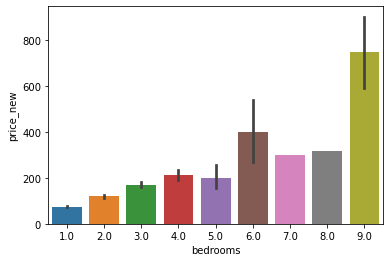

In [79]:
sns.barplot(x='bedrooms', y='price_new', data=df1)
plt.show()

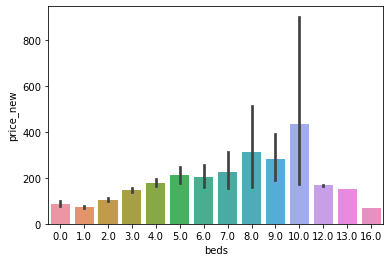

In [80]:
sns.barplot(x='beds', y='price_new', data=df1)
plt.show()

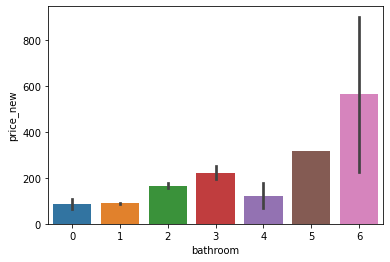

In [81]:
sns.barplot(x='bathroom', y='price_new', data=df1)
plt.show()

In [82]:
#sns.barplot(x='instant_bookable', y='price_new', data=df)
#plt.show()

In [83]:
#sns.barplot(x='host_is_superhost', y='price_new', data=df)
#plt.show()

In [84]:
#sns.barplot(x='host_has_profile_pic', y='price_new', data=df)
#plt.show()

In [85]:
#sns.barplot(x='host_identity_verified', y='price_new', data=df)
#plt.show()

In [86]:
#sns.barplot(x='review_scores_location', y='price_new', data=df)
#plt.show()

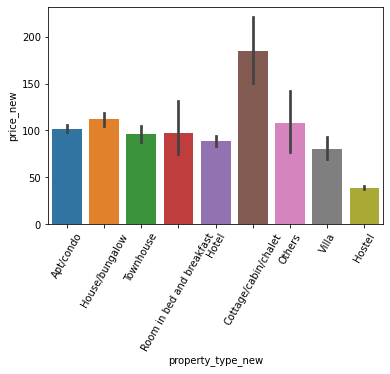

In [87]:
plt.xticks(rotation=60)
sns.barplot(x='property_type_new', y='price_new', data=df)
plt.show()

In [88]:
correlation = df1.corr()

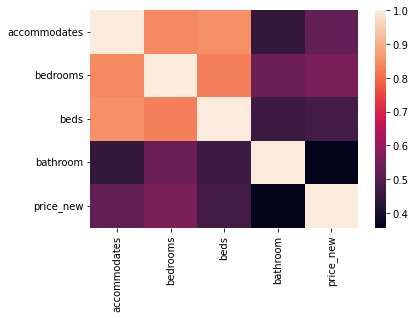

In [89]:
sns.heatmap(correlation, annot = False)

plt.show()

In [90]:
df1.isnull().sum()

accommodates      0
bedrooms        212
beds             20
bathroom          0
price_new         0
dtype: int64

C:\Users\16473\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


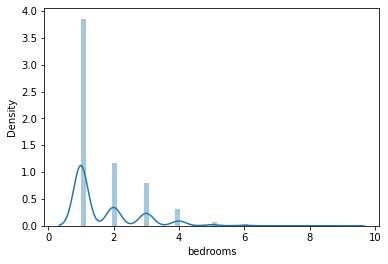

In [91]:
sns.distplot(df['bedrooms'])
plt.show()

C:\Users\16473\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


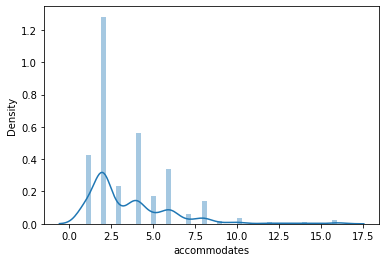

In [92]:
sns.distplot(df['accommodates'])
plt.show()

C:\Users\16473\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


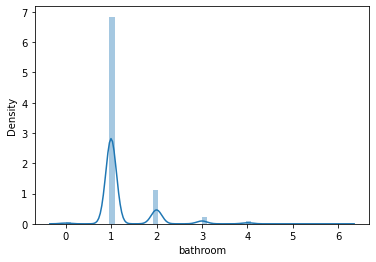

In [93]:
sns.distplot(df['bathroom'])
plt.show()

C:\Users\16473\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


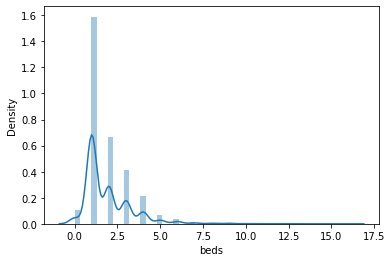

In [94]:
sns.distplot(df['beds'])
plt.show()

In [95]:
df['bedrooms'].mean()

1.6723646723646723

In [96]:
df['bedrooms'].fillna(1, inplace=True)

In [97]:
df['beds'].mean()

1.8942997357493394

In [98]:
df['beds'].fillna(1, inplace=True)

In [99]:
df['bedrooms']=df['bedrooms'].astype(int)

In [100]:
df['beds']=df['beds'].astype(int)

In [101]:
df['host_response_rate'].mean()

0.9191253951527971

In [102]:
df['host_response_rate'].fillna(0.91, inplace=True)

In [103]:
df['host_acceptance_rate'].mean()

0.8415335753176141

In [104]:
df['host_acceptance_rate'].fillna(0.84, inplace=True)

In [105]:
df['review_scores_rating'].mean()

94.65822784810126

In [106]:
df['review_scores_rating'].fillna(94.65, inplace=True)

In [107]:
df['review_scores_accuracy'].mean()

9.666666666666666

In [108]:
df['review_scores_accuracy'].fillna(9.66, inplace=True)

In [109]:
df['review_scores_cleanliness'].mean()

9.519239474875508

In [110]:
df['review_scores_cleanliness'].fillna(9.51, inplace=True)

In [111]:
df['review_scores_checkin'].mean()

9.822836429542365

In [112]:
df['review_scores_checkin'].fillna(9.82, inplace=True)

In [113]:
df['review_scores_communication'].mean()

9.788400543724514

In [114]:
df['review_scores_communication'].fillna(9.78, inplace=True)

In [115]:
df['review_scores_location'].mean()

9.69777979157227

In [116]:
df['review_scores_location'].fillna(9.67, inplace=True)

In [117]:
df['review_scores_value'].mean()

9.493429995468963

In [118]:
df['review_scores_value'].fillna(9.49, inplace=True)

In [119]:
df['reviews_per_month'].mean()

1.6334672021418986

In [120]:
df['reviews_per_month'].fillna(1.63, inplace=True)

In [121]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,property_type_new,price_new,bathroom
0,0.91,0.84,0,0,0,Capital,45.40924,-75.67900,Private room in apartment,Private room,2,1,1,7,31,7.0,31.0,30,0,0,0,94.65,9.66,9.51,9.82,9.78,9.67,9.49,0,1.63,Apt/condo,202,1
1,0.91,1.00,0,1,0,Kitchissippi,45.40159,-75.74679,Private room in house,Private room,2,1,1,3,14,3.0,14.0,0,87,1,0,94.00,10.00,10.00,10.00,10.00,10.00,9.00,0,0.69,House/bungalow,65,2
2,0.91,0.84,0,1,1,Bay,45.35900,-75.80314,Entire apartment,Entire home/apt,4,1,1,3,730,3.0,730.0,0,1,0,0,100.00,10.00,8.00,10.00,10.00,10.00,10.00,0,0.01,Apt/condo,200,1
3,1.00,1.00,0,1,1,Capital,45.40248,-75.69941,Entire house,Entire home/apt,3,2,2,3,365,3.0,365.0,0,7,0,0,95.00,10.00,9.00,10.00,10.00,10.00,10.00,0,0.06,House/bungalow,140,1
4,1.00,0.71,1,1,1,Kitchissippi,45.38972,-75.75496,Entire apartment,Entire home/apt,4,1,1,3,180,3.0,180.0,0,64,4,1,99.00,10.00,10.00,10.00,10.00,10.00,10.00,0,0.59,Apt/condo,150,1


In [122]:
df = pd.get_dummies(df, columns=['property_type_new', 'room_type'])

In [123]:
df.drop(['neighbourhood_cleansed','property_type','neighbourhood_cleansed','latitude','longitude'], inplace=True, axis=1)

In [124]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price_new,bathroom,property_type_new_Apt/condo,property_type_new_Cottage/cabin/chalet,property_type_new_Hostel,property_type_new_Hotel,property_type_new_House/bungalow,property_type_new_Others,property_type_new_Room in bed and breakfast,property_type_new_Townhouse,property_type_new_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.91,0.84,0,0,0,2,1,1,7,31,7.0,31.0,30,0,0,0,94.65,9.66,9.51,9.82,9.78,9.67,9.49,0,1.63,202,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0.91,1.00,0,1,0,2,1,1,3,14,3.0,14.0,0,87,1,0,94.00,10.00,10.00,10.00,10.00,10.00,9.00,0,0.69,65,2,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0.91,0.84,0,1,1,4,1,1,3,730,3.0,730.0,0,1,0,0,100.00,10.00,8.00,10.00,10.00,10.00,10.00,0,0.01,200,1,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1.00,1.00,0,1,1,3,2,2,3,365,3.0,365.0,0,7,0,0,95.00,10.00,9.00,10.00,10.00,10.00,10.00,0,0.06,140,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,1.00,0.71,1,1,1,4,1,1,3,180,3.0,180.0,0,64,4,1,99.00,10.00,10.00,10.00,10.00,10.00,10.00,0,0.59,150,1,1,0,0,0,0,0,0,0,0,1,0,0,0


# 1. Decision Tree Model

In [125]:
x = df.drop('price_new',axis =1)
y = df['price_new']

In [126]:
from sklearn.metrics import mean_absolute_error

In [127]:
# import module
from sklearn.model_selection import train_test_split

# Split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1234)

In [128]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((2135, 39), (2135,), (534, 39), (534,))

In [129]:
from sklearn.tree import DecisionTreeRegressor

In [132]:
dtmodel = DecisionTreeRegressor(max_depth=4, min_samples_split=30).fit(xtrain,ytrain)

In [133]:
ytrain_pred = dtmodel.predict(xtrain)

In [134]:
from sklearn.metrics import mean_absolute_error

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, ytrain)
train_mae

38.74272021138907

In [135]:
ytest_pred = dtmodel.predict(xtest)

In [136]:
test_mae = mean_absolute_error(ytest_pred, ytest)
print('Test mae is:', test_mae)

Test mae is: 36.07441267815511


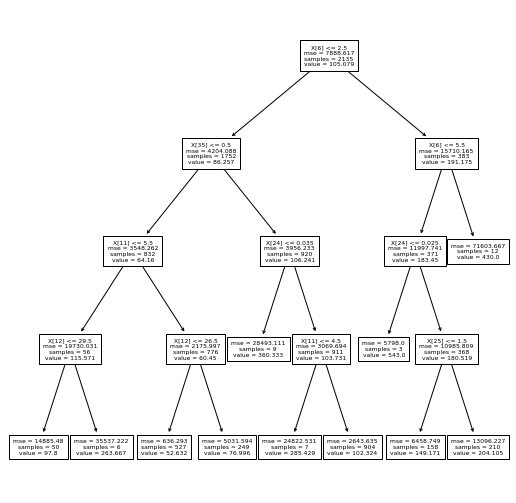

In [149]:
from sklearn import tree
plt.figure(figsize=(9,9))
tree.plot_tree(dtmodel,fontsize=6)
plt.show()

In [150]:
dtmodel.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.61006664, 0.        , 0.        , 0.        ,
       0.        , 0.05734039, 0.03628055, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.14317994,
       0.0398422 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.11329028, 0.        , 0.        , 0.        ])

In [151]:
df=pd.DataFrame({'Feature_names':x.columns,'Importances':dtmodel.feature_importances_})
df

,Feature_names,Importances
0,host_response_rate,0.000000
1,host_acceptance_rate,0.000000
2,host_is_superhost,0.000000
3,host_has_profile_pic,0.000000
4,host_identity_verified,0.000000
5,accommodates,0.000000
6,bedrooms,0.610067
7,beds,0.000000
8,minimum_nights,0.000000
9,maximum_nights,0.000000


In [152]:
df1 = df.sort_values(by='Importances',ascending=True)

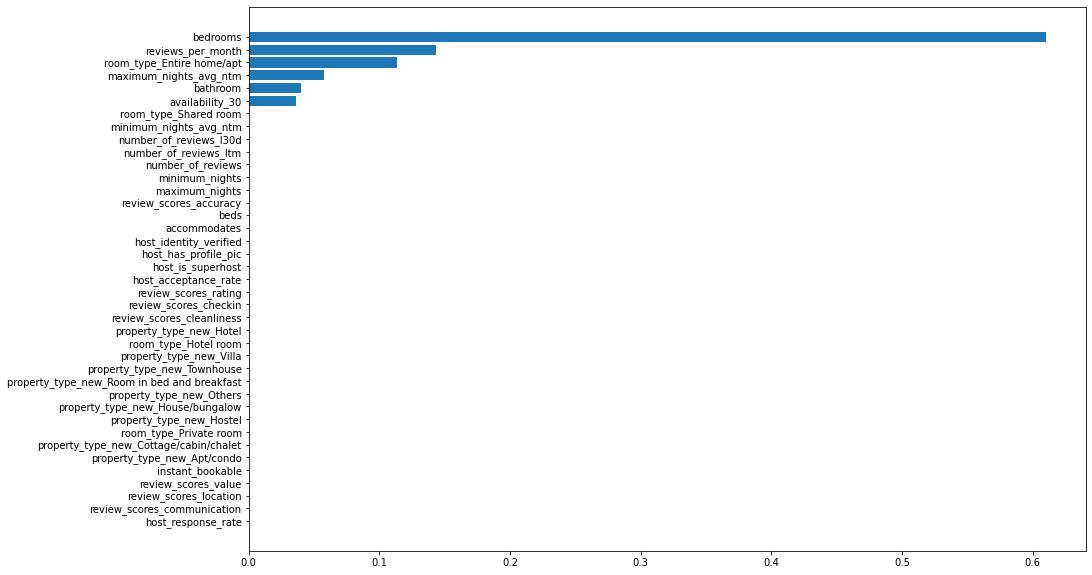

In [153]:
plt.figure(figsize=(15,10))
plt.barh(df1['Feature_names'],df1['Importances'])
plt.show()

# 2. Linear Regression Model

In [200]:
from sklearn.linear_model import LinearRegression

In [201]:
# train your model
lrmodel = LinearRegression().fit(xtrain,ytrain)

# make preditions on train set
train_pred = lrmodel.predict(xtrain)

In [202]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train_pred, ytrain)
print('Training mae is:', train_mae)

Training mae is: 38.853233248280425


In [203]:
# make predictions on test set
test_pred = lrmodel.predict(xtest)

#evaluate the model
test_mae = mean_absolute_error(test_pred, ytest)
print('Testing mae is:', test_mae)

Testing mae is: 34.967723511138104


# Coefficient

In [158]:
intercept = lrmodel.intercept_

In [159]:
intercept

-33.79281643215576

In [160]:
coefficients = lrmodel.coef_

In [161]:
coefficients

array([-1.35433332e+01, -1.29063896e+00, -9.30190062e-01,  6.71469712e+00,
        3.86568685e+00,  4.68793452e+00,  2.51385693e+01, -2.49080383e+00,
        4.25851508e-01, -6.86673395e-03, -4.13700838e-01, -4.13817903e-07,
        9.67126503e-01, -2.70992768e-02, -1.85277652e-01, -2.32869183e+00,
        1.04933334e+00,  6.31399868e-01,  3.78861921e+00,  8.38154429e-01,
       -3.98759573e-01,  5.79344863e+00, -1.43657153e+01,  1.73595595e+00,
       -3.32196915e+00,  2.00926080e+01,  6.64219973e+00,  5.01829520e+01,
       -1.44620368e+02, -2.01701259e+00,  1.52846222e+01,  2.46268448e+01,
        3.46099276e+01,  1.16459726e+01,  3.64486205e+00,  1.05893789e+01,
        6.77164651e+01, -3.39967768e+01, -4.43090672e+01])

In [162]:
features = pd.DataFrame(coefficients, x.columns, columns = ["coefficient"])

In [163]:
features.coefficient = features.coefficient.abs()

In [164]:
features

,coefficient
host_response_rate,1.354333e+01
host_acceptance_rate,1.290639e+00
host_is_superhost,9.301901e-01
host_has_profile_pic,6.714697e+00
host_identity_verified,3.865687e+00
accommodates,4.687935e+00
bedrooms,2.513857e+01
beds,2.490804e+00
minimum_nights,4.258515e-01
maximum_nights,6.866734e-03


In [165]:
x.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'bathroom', 'property_type_new_Apt/condo',
       'property_type_new_Cottage/cabin/chalet', 'property_type_new_Hostel',
       'property_type_new_Hotel', 'property_type_new_House/bungalow',
       'property_type_new_Others',
       'property_type_new_Room in bed and breakfast',
       'property_type_new_Townhouse', 'property_type_new_Villa',
       'room_type_Entire home

# Standard Deviations

In [166]:
stdevs = []
for i in x.columns:
    stdev = x[i].std()
    print(i,"->",stdev)
    stdevs.append(stdev)

host_response_rate -> 0.18228579977120693
host_acceptance_rate -> 0.22175320202187251
host_is_superhost -> 0.4776267568728045
host_has_profile_pic -> 0.07477025973255134
host_identity_verified -> 0.40911055631085325
accommodates -> 2.5295050652495896
bedrooms -> 1.0144164548014758
beds -> 1.4339897667736785
minimum_nights -> 43.01102343720037
maximum_nights -> 547.8930361735768
minimum_nights_avg_ntm -> 42.624005905992206
maximum_nights_avg_ntm -> 3007736.950322646
availability_30 -> 12.485653006744377
number_of_reviews -> 63.39882855333191
number_of_reviews_ltm -> 14.632474074573233
number_of_reviews_l30d -> 1.3711171465090295
review_scores_rating -> 7.55126521894806
review_scores_accuracy -> 0.7793924748952334
review_scores_cleanliness -> 0.8134607855322374
review_scores_checkin -> 0.6200462203769537
review_scores_communication -> 0.6916209837832141
review_scores_location -> 0.6547353571085349
review_scores_value -> 0.8281179392953533
instant_bookable -> 0.4786602952035614
reviews_pe

In [167]:
stdevs

[0.18228579977120693,
 0.22175320202187251,
 0.4776267568728045,
 0.07477025973255134,
 0.40911055631085325,
 2.5295050652495896,
 1.0144164548014758,
 1.4339897667736785,
 43.01102343720037,
 547.8930361735768,
 42.624005905992206,
 3007736.950322646,
 12.485653006744377,
 63.39882855333191,
 14.632474074573233,
 1.3711171465090295,
 7.55126521894806,
 0.7793924748952334,
 0.8134607855322374,
 0.6200462203769537,
 0.6916209837832141,
 0.6547353571085349,
 0.8281179392953533,
 0.4786602952035614,
 1.669873757444021,
 0.5635726586688715,
 0.4877643018335516,
 0.07224854095598246,
 0.07224854095598247,
 0.26272888052517457,
 0.48591674411529656,
 0.07720784252255791,
 0.11849090672648792,
 0.32446067933604245,
 0.06110714158389372,
 0.4906956227039797,
 0.08186041026619481,
 0.48759411778922074,
 0.08836930476257329]

In [168]:
features["std"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["std"]*features["coefficient"]
features["importance_normalized"] = features["importance"]/ features["importance"].max()

In [169]:
features

,coefficient,std,importance,importance_normalized
host_response_rate,1.354333e+01,1.822858e-01,2.468757,0.096810
host_acceptance_rate,1.290639e+00,2.217532e-01,0.286203,0.011223
host_is_superhost,9.301901e-01,4.776268e-01,0.444284,0.017422
host_has_profile_pic,6.714697e+00,7.477026e-02,0.502060,0.019688
host_identity_verified,3.865687e+00,4.091106e-01,1.581493,0.062017
accommodates,4.687935e+00,2.529505e+00,11.858154,0.465008
bedrooms,2.513857e+01,1.014416e+00,25.500978,1.000000
beds,2.490804e+00,1.433990e+00,3.571787,0.140065
minimum_nights,4.258515e-01,4.301102e+01,18.316309,0.718259
maximum_nights,6.866734e-03,5.478930e+02,3.762236,0.147533


In [170]:
features1 = features.sort_values(by='importance_normalized', ascending=True)

<BarContainer object of 39 artists>

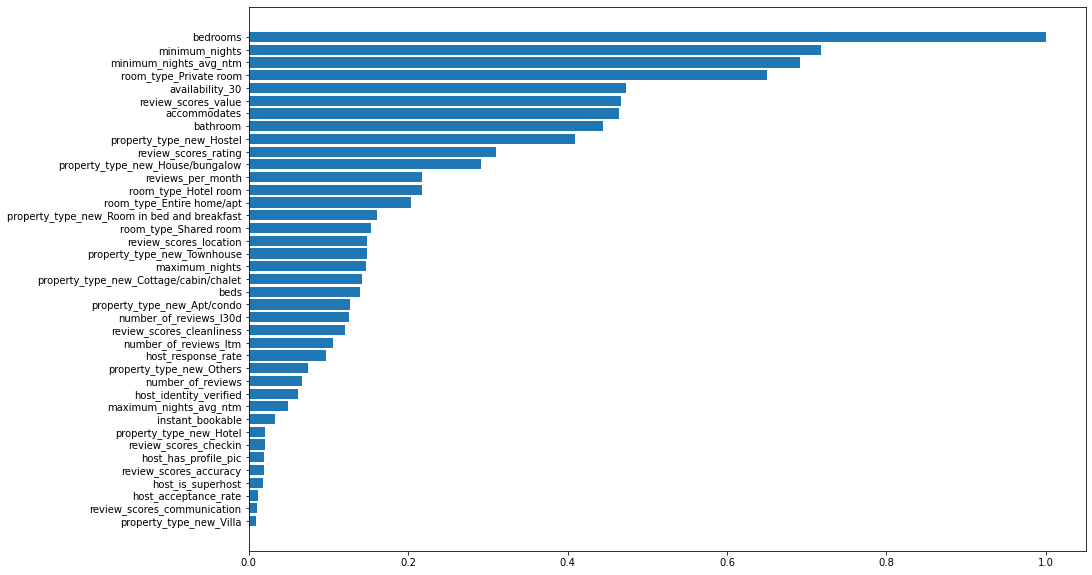

In [171]:
plt.figure(figsize=(15,10))
plt.barh(features1.index, features1.importance_normalized)

# 3. Random Forest

In [190]:
from sklearn.metrics import mean_absolute_error

In [191]:
# import module
from sklearn.model_selection import train_test_split

# Split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1234)

In [192]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((2135, 39), (2135,), (534, 39), (534,))

In [193]:
from sklearn.ensemble import RandomForestRegressor

In [194]:
rfmodel = RandomForestRegressor(n_estimators=200, criterion='mae').fit(xtrain,ytrain)

In [195]:
ytrain_pred = rfmodel.predict(xtrain)

In [196]:
train_mae = mean_absolute_error(ytrain_pred, ytrain)
print('Training mae is:', test_mae)

Training mae is: 34.967723511138104


In [197]:
ytest_pred = rfmodel.predict(xtest)

In [198]:
test_mae = mean_absolute_error(ytest_pred, ytest)
print('Testing mae is:', test_mae)

Testing mae is: 34.22202247191011


In [204]:
rfmodel

RandomForestRegressor(criterion='mae', n_estimators=200)

In [205]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rfmodel, xtrain, ytrain):
    return r2_score(ytrain, rfmodel.predict(xtrain))

perm_imp_rfpimp = permutation_importances(rfmodel, xtrain, ytrain, r2)
perm_imp_rfpimp

,Importance
Feature,
room_type_Entire home/apt,4.085365e-01
bedrooms,3.913442e-01
reviews_per_month,2.350271e-01
availability_30,1.467621e-01
bathroom,1.388373e-01
accommodates,1.293100e-01
maximum_nights_avg_ntm,9.119463e-02
host_acceptance_rate,6.563486e-02
number_of_reviews,5.674043e-02


<AxesSubplot:xlabel='Importance', ylabel='Features'>

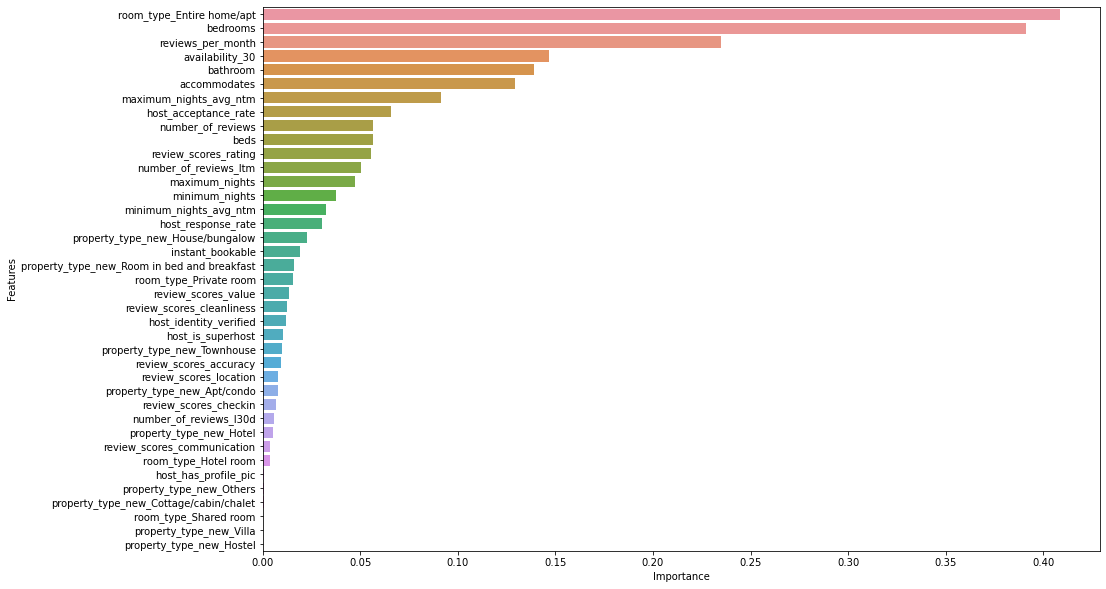

In [206]:
#plt.plot(perm_imp_rfpimp['Feature'], perm_imp_rfpimp['Importance'])
perm_imp_rfpimp['Features'] = perm_imp_rfpimp.index
plt.figure(figsize=(15,10))
sns.barplot(x= perm_imp_rfpimp['Importance'], y=perm_imp_rfpimp['Features'])

# Results:

Random Forest Model has better performance with 34.222 mae value on test data.

# Logistic Regression

In [207]:
# Seperate the input features and target variable
#x = df.drop('price_new', axis = 1)
#y = df.price_new

In [208]:
# splitting the data in training and testing set
#from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=123)

In [209]:
#xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

In [210]:
# Import and fit a logistic regression model
#from sklearn.linear_model import LogisticRegression

#lmodel = LogisticRegression().fit(xtrain, ytrain)

In [211]:
#from sklearn.metrics import accuracy_score, confusion_matrix

#ypred = lmodel.predict(xtest)

#accuracy_score(ypred, ytest)

# Multiple Linear Regressions

In [212]:
#X = df.drop('price_new',axis =1).values
#y = df['price_new'].values

In [213]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [214]:
#import warnings
#warnings.filterwarnings('ignore')

In [215]:
#from sklearn.preprocessing import StandardScaler
#s_scaler = StandardScaler()
#X_train = s_scaler.fit_transform(X_train.astype(np.float))
#X_test = s_scaler.transform(X_test.astype(np.float))

In [216]:
#from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()  
#regressor.fit(X_train, y_train)

In [217]:
#print(regressor.intercept_)
#print(regressor.coef_)

In [218]:
#y_pred = regressor.predict(X_test)
#y_pred

In [219]:
#coeff_df = pd.DataFrame(regressor.coef_, df.drop('price_new',axis =1).columns, columns=['Coefficient']) 
#coeff_df

In [220]:
#y_pred = regressor.predict(X_test)
#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df1 = df.head(10)
#df1

In [221]:
#from sklearn import metrics
#print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

In [222]:
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error

In [223]:
#print('r2_score:',r2_score(y_test,y_pred))